Set up drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


install dependences

In [ ]:
!pip install youtube-transcript-api
!pip install transformers torch
#load cleaned data
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 11.2 MB/s eta 0:00:00


**load sentiment piplene -pretrained model**

In [ ]:


# Update the path based on where your file is
df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-sentimented.csv")

# Drop missing or empty comments just in case
df = df.dropna(subset=["cleaned_comment"])
df = df[df["cleaned_comment"].str.strip() != ""]
#load pretrained model
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def get_sentiment(text):
    try:
        # Truncate input text safely to 512 tokens max (roberta's limit)
        encoded = tokenizer(text, truncation=True, max_length=512, return_tensors="pt")
        output = model(**encoded)
        prediction = output.logits.argmax(dim=1).item()

        label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
        return label_map[prediction]
    except Exception as e:
        print(f"Error processing: {text[:50]}... — {str(e)}")
        return "Unknown"


**Run Sentiment on All Comments**

In [ ]:
# Map model's output labels to readable values
label_map = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

# Apply sentiment prediction
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return label_map[result['label']]

# You can test on a subset first
df = df.head(100)

df['sentiment'] = df['cleaned_comment'].apply(get_sentiment)
df.to_csv("/content/drive/MyDrive/comments_with_sentiment.csv", index=False)
print(" Sentiment-labeled file saved to Drive.")




✅ Sentiment-labeled file saved to Drive.


visulaize on graph

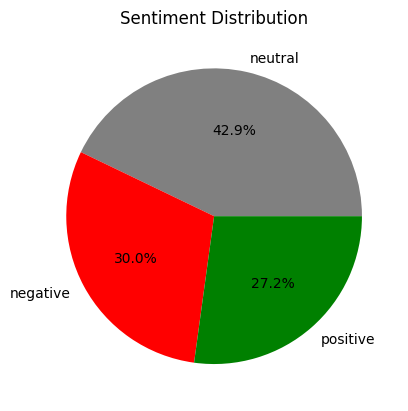

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-sentimented.csv")

df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["gray", "red", "green"], title="Sentiment Distribution")
plt.ylabel("")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-sentimented.csv")

df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["gray", "red", "green"], title="Sentiment Distribution")
plt.ylabel("")
plt.show()




---

Topic Modeling Using BERTopic
**bold text**
---



In [ ]:
#installing dependences
!pip install bertopic
!pip install umap-learn
import seaborn as sns
from umap import UMAP



In [ ]:
# Load your cleaned comment data
df = pd.read_csv("/content/drive/MyDrive/comments_with_sentiment.csv")
texts = df['cleaned_comment'].dropna().tolist()

#create and fit BERTopic Model
from bertopic import BERTopic

# Initialize topic model
topic_model = BERTopic(verbose=True)

# Fit the model on your cleaned comments
topics, probs = topic_model.fit_transform(texts)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
2025-11-17 06:28:19,831 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-11-17 06:28:29,680 - BERTopic - Embedding - Completed ✓
2025-11-17 06:28:29,684 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-17 06:28:40,273 - BERTopic - Dimensionality - Completed ✓
2025-11-17 06:28:40,275 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-17 06:28:40,294 - BERTopic - Cluster - Completed ✓
2025-11-17 06:28:40,309 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-17 06:28:40,358 - BERTopic - Representation - Completed ✓


visulaize

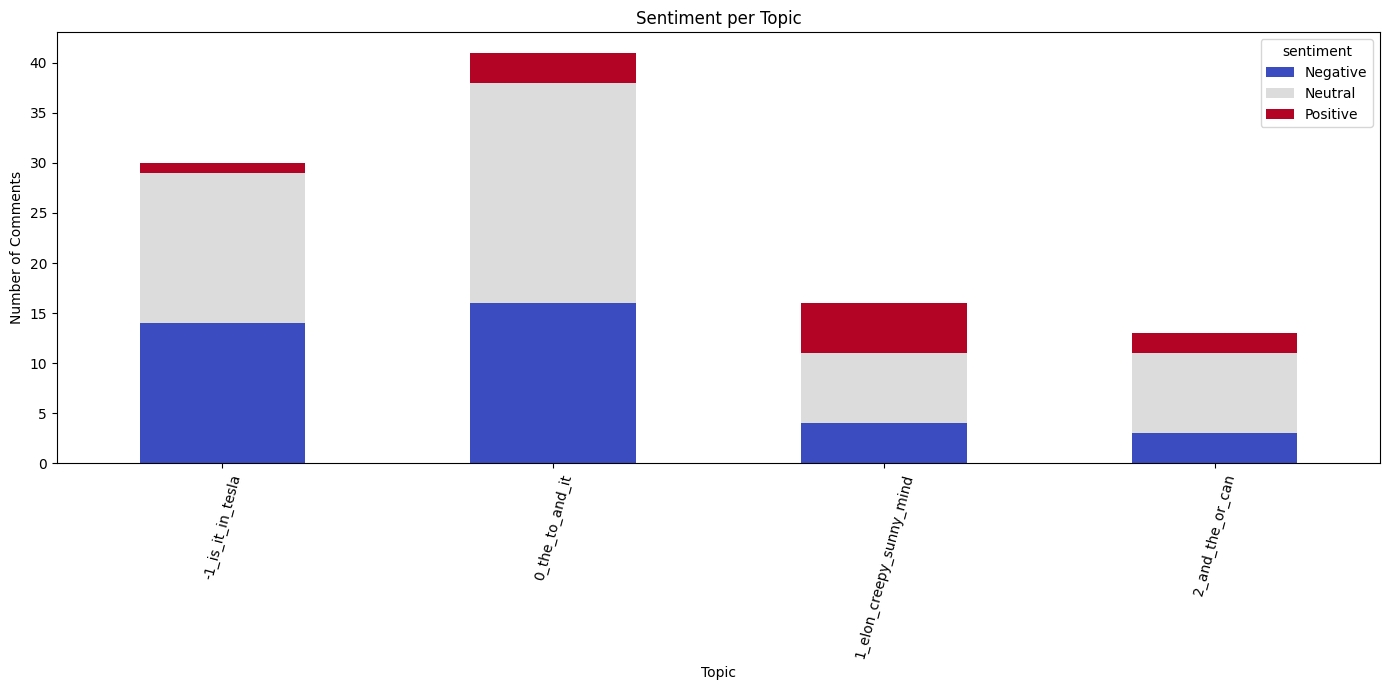

In [ ]:
# Show top 10 topics
topic_model.get_topic_info().head(100)

topic_model.visualize_barchart(top_n_topics=10)
topic_info = topic_model.get_topic_info()
# Map topic ID to its top words (for labeling)
topic_labels = topic_info.set_index("Topic")["Name"].to_dict()

df['topic_label'] = df['topic'].map(topic_labels)

df.to_csv("/content/drive/MyDrive/comments_with_topics.csv", index=False)

# Group by topic label now, not ID
topic_sentiment = df.groupby(['topic_label', 'sentiment']).size().unstack().fillna(0)

# Plot
topic_sentiment.plot(kind='bar', stacked=True, figsize=(14,7), colormap="coolwarm")
plt.title("Sentiment per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()



Generate Readable Topic Labels

In [ ]:
topic_info = topic_model.get_topic_info()
def generate_topic_label(row, num_words=4):
    # Directly use the list of keywords
    keywords = row['Representation']
    return "Topic: " + ", ".join(keywords[:num_words])

# Apply to topic_info DataFrame
topic_info['Readable_Name'] = topic_info.apply(generate_topic_label, axis=1)
topic_name_dict = topic_info.set_index('Topic')['Readable_Name'].to_dict()
df['topic_name'] = df['topic'].map(topic_name_dict)
# Path in Google Drive
df_output_path = "/content/drive/MyDrive/youtube_comments_with_topic_names.csv"

# Save to CSV
df.to_csv(df_output_path, index=False)

print("Saved comments with readable topic names to Drive:", df_output_path)

def generate_detailed_label(row, num_keywords=4):
    keywords = row['Representation']  # Already a list
    example = row['Representative_Docs'][0] if isinstance(row['Representative_Docs'], list) and row['Representative_Docs'] else ""
    return f"Topic: {', '.join(keywords[:num_keywords])} — e.g. '{example[:80]}...'"
topic_info['Detailed_Label'] = topic_info.apply(generate_detailed_label, axis=1)






✅ Saved comments with readable topic names to Drive: /content/drive/MyDrive/youtube_comments_with_topic_names.csv




---



---
Summarization

---



---




In [ ]:
#install dependencies
!pip install transformers sentencepiece
from transformers import pipeline


In [ ]:
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

topic_summaries = {}

for topic_id in df['topic'].unique():
    if topic_id == -1:
        continue  # Skip noise topic

    topic_comments = df[df['topic'] == topic_id]['cleaned_comment'].dropna().tolist()

    # Join or sample 10 representative comments
    text_block = " ".join(topic_comments[:10])[:1024]  # limit length for small models

    # Add prefix as required by T5
    input_text = "summarize: " + text_block

    try:
        summary = summarizer(input_text, max_length=60, min_length=15, do_sample=False)[0]['summary_text']
        topic_summaries[topic_id] = summary
    except Exception as e:
        print(f"Topic {topic_id} failed: {e}")
        topic_summaries[topic_id] = "Summary unavailable."

topic_info['Summary'] = topic_info['Topic'].map(topic_summaries)
summary_path = "/content/drive/MyDrive/topic_summary_with_text.csv"
topic_info.to_csv(summary_path, index=False)
print("opic summaries saved to:", summary_path)



Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


opic summaries saved to: /content/drive/MyDrive/topic_summary_with_text.csv




---



Actionability Scoring



---



In [ ]:
# Count frequency per topic
topic_freq = df['topic'].value_counts().to_dict()

def compute_actionability(row):
    freq_score = topic_freq.get(row['topic'], 1)

    # Sentiment weight
    sentiment_weight = {
        'Positive': 0.5,
        'Neutral': 0.7,
        'Negative': 1.0
    }.get(row['sentiment'], 0.6)

    return freq_score * sentiment_weight

df['actionability_score'] = df.apply(compute_actionability, axis=1)
df.to_csv("/content/drive/MyDrive/comments_with_scores.csv", index=False)


Transcript matching with sentence

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

sbert = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight and effective


In [ ]:
transcript_path = "/content/drive/MyDrive/transcript.csv"

with open(transcript_path, "r", encoding="utf-8") as f:
    transcript_sentences = [line.strip() for line in f if line.strip()]
# Encode transcript once
transcript_embeddings = sbert.encode(transcript_sentences, convert_to_tensor=True)

# Check similarity for each comment
def is_unanswered(comment):
    try:
        comment_embedding = sbert.encode(comment, convert_to_tensor=True)
        cosine_scores = util.cos_sim(comment_embedding, transcript_embeddings)[0]
        max_sim = cosine_scores.max().item()
        return max_sim < 10  # tweak threshold
    except:
        return False

# Apply only to suggestion or question type comments (optional filter)
df['unanswered'] = df['cleaned_comment'].apply(is_unanswered)
print(df)
#df.to_csv("/content/drive/MyDrive/comments_with_actionability.csv", index=False)



                                      cleaned_comment sentiment  topic  \
0                                   support me please  Positive      1   
1                                               , , ,   Neutral      1   
2   that s the part most people miss. they let fea...  Negative      0   
3   people need to understand that if nobody buys ...   Neutral      0   
4   people keep saying these humanoid robots are b...  Negative      0   
..                                                ...       ...    ...   
95  20k for a robot that can do all your house tas...   Neutral      0   
96  i know we re worried about ai taking over yada...   Neutral     -1   
97                      that porsche hoody, i want it  Positive      1   
98  personally i think star wars came much closer ...  Negative      0   
99             it is a 2 min video that lasts 16 min.   Neutral     -1   

                 topic_label                        topic_name  \
0   1_elon_creepy_sunny_mind  Topic: elon, cr

visulaize unanswered

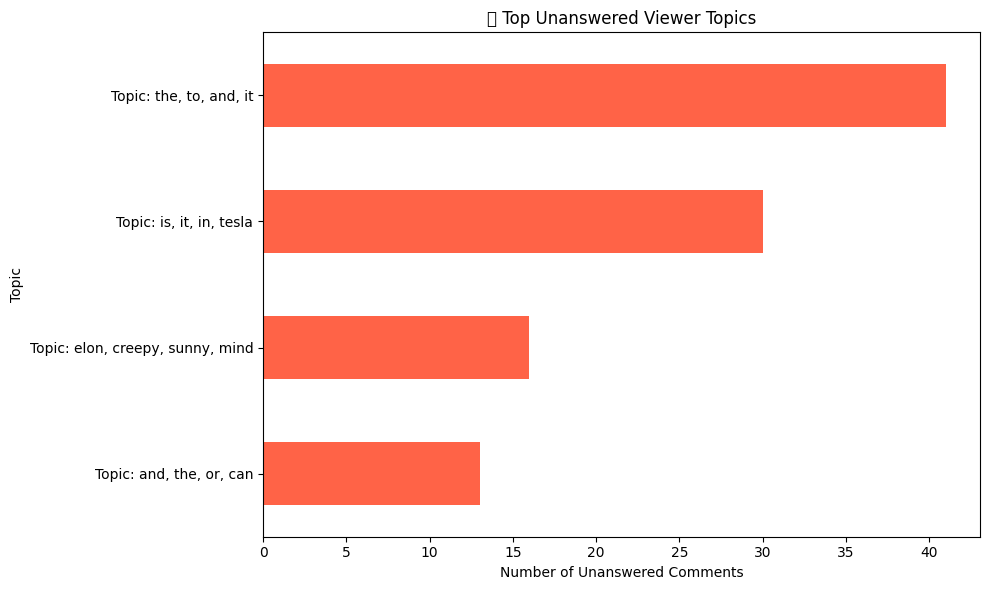

In [ ]:
unanswered_df = df[df['unanswered'] == True]
#group them
top_unanswered = unanswered_df.groupby('topic_name').size().sort_values(ascending=False).head(10)
#plot

top_unanswered.plot(kind='barh', figsize=(10, 6), color='tomato')
plt.xlabel("Number of Unanswered Comments")
plt.ylabel("Topic")
plt.title("🔍 Top Unanswered Viewer Topics")
plt.gca().invert_yaxis()  # most important on top
plt.tight_layout()
plt.show()

top_unanswered_df = top_unanswered.reset_index()
top_unanswered_df.columns = ['topic_name', 'unanswered_count']
top_unanswered_df.to_csv("/content/drive/MyDrive/top_unanswered_topics.csv", index=False)



In [4]:
!pip install youtube-transcript-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 9.4 MB/s eta 0:00:00


Semantic Matching

In [5]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
import pandas as pd
# Replace with your actual file name
comments_df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-labelled.csv")
relevant_comments = comments_df[comments_df['intent_group'].isin(['Question', 'Suggestion'])]
comment_texts = relevant_comments['cleanedCommentText'].tolist()

transcript_df = pd.read_csv("/content/drive/MyDrive/j31dmodZ-5c/transcript.csv")


transcript_sentences = transcript_df['text'].dropna().tolist()
model = SentenceTransformer('all-MiniLM-L6-v2')
print(f"Transcript sentence count: {len(transcript_sentences)}")
print("First few transcript sentences:")
# Filter out short or empty transcript lines (less than 3 words)
filtered_transcript_sentences = [
    line.strip() for line in transcript_sentences
    if line.strip() and len(line.strip().split()) > 2
]


print(f"Filtered transcript sentence count: {len(filtered_transcript_sentences)}")
comment_embeddings = model.encode(comment_texts, convert_to_tensor=True)


transcript_embeddings = model.encode(filtered_transcript_sentences, convert_to_tensor=True)

print




# # Encode both comments and transcript
# comment_embeddings = model.encode(comment_texts, convert_to_tensor=True)
# transcript_embeddings = model.encode(transcript_sentences, convert_to_tensor=True)


# # Now compute cosine similarity
# cosine_scores = util.cos_sim(comment_embeddings, transcript_embeddings)

# # For each comment, get the max similarity to transcript
# max_scores, _ = cosine_scores.max(dim=1)

# relevant_comments_df = relevant_comments_df.copy()
# relevant_comments_df['max_similarity_to_transcript'] = max_scores.cpu().numpy()

# # Flag comments with low similarity (unanswered questions)
# threshold = 0.6
# relevant_comments_df['is_unanswered'] = relevant_comments_df['max_similarity_to_transcript'] < threshold






Transcript sentence count: 423
First few transcript sentences:
Filtered transcript sentence count: 413


KeyboardInterrupt: 

In [8]:
from sentence_transformers.util import cos_sim
df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-labelled.csv")
# Filter comments where either is_question or is_suggestion is True
qs_df = df[(df['is_question'] == True) | (df['is_suggestion'] == True)].copy()

# Optional: Reset index for cleaner DataFrame
qs_df.reset_index(drop=True, inplace=True)


# Preview the result
print(qs_df[['cleanedCommentText', 'is_question', 'is_suggestion']].head())
qs_df['actionability_score'] = (
    qs_df['engagement_score'] * 0.4 +
    qs_df['sentiment_strength'] * 0.4 +
    (qs_df['is_question'].astype(int) + qs_df['is_suggestion'].astype(int)) * 0.2
)
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('all-MiniLM-L6-v2')
# comment_embeddings = model.encode(qs_df['cleanedCommentText'].tolist(), convert_to_tensor=True)




# print(comment_embeddings)
# print(transcript_embeddings)

                                  cleanedCommentText  is_question  \
0  better than anything that marvel has done late...         True   
1  what a terrible review. 'it should be able to ...         True   
2               awesome! i would love to watch this!         True   
3  the sheer amount of things you can explain wit...         True   
4  moto g p is more dengres than f 1.please make ...        False   

   is_suggestion  
0          False  
1          False  
2           True  
3           True  
4           True  


In [9]:
# Sort by score
top_actionable = qs_df.sort_values(by='actionability_score', ascending=False).head(10)

# Show top 5
print(top_actionable[['cleanedCommentText', 'actionability_score']])


                                      cleanedCommentText  actionability_score
7948   you have no actual idea how much i would love ...             1.189744
1582   i would love it if you can continue this video...             1.189680
9081   the woman who won 5 cars was the most heartwar...             1.188725
22731  the carnot's heat engine was so beautifully de...             1.188326
22905  just awesome, i literally have no words to des...             1.187789
17249  this will be great! it needs support because i...             1.186668
22675  thank you for dhruv sir!!! your contribution o...             1.186412
16252  really appreciate your effort...never thought ...             1.184193
24439  he's the kind of teacher that can make you int...             1.183726
20243  you re such an incredible interviewer! the pac...             1.183616


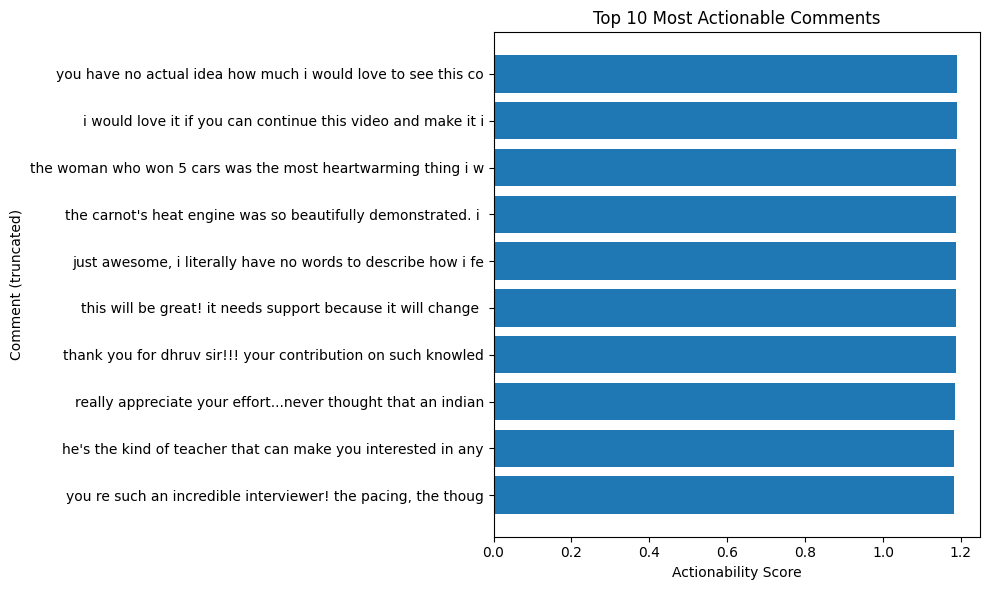

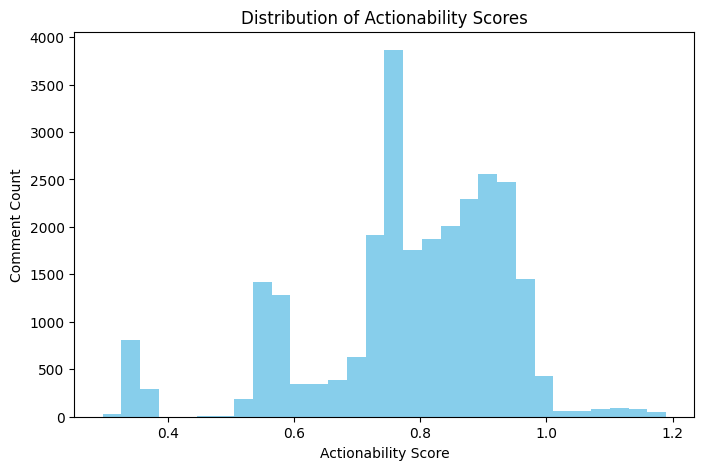